In [1]:
import numpy as np
import pandas as pd
import requests
import io


# Downloading the csv file from your GitHub account, training data
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/allison2368/ABIDE/main/abide_behavioral.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.columns

Index(['SITE_ID', 'SUB_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX',
       'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ',
       'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE',
       'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
       'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE',
       'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
       'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
       'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION',
       'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION',
       'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL',
       'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME',
       'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED',
       'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED',
       'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED',
       'VINELAND_DOMESTIC_

In [2]:

# get the indexes of dataframe where there are severity values
severity = df['ADOS_GOTHAM_SEVERITY']
severity_complete = severity.replace([np.nan], 0)
severity_complete = severity_complete.replace(-9999.0, "na")

severity_list = []
#print(df['ADOS_GOTHAM_SEVERITY'])
for i in severity_complete:
    severity_list.append(i)

print(severity_list)
ind_first = severity_list.index(1.0)
ind_last = severity_list.index(0)
print(ind_first, ind_last)

['na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 

In [3]:
# should be indexes 44 and 317 
df[ind_first:ind_last]

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
44,UCLA_1,51205,1,1,17.9400,1,R,NaN,102.0,105.0,...,1.0,17.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,UM_1,50281,1,2,10.7000,1,R,NaN,132.0,131.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,UM_2,50397,1,1,14.7000,1,-9999,NaN,116.0,132.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,USM,50432,2,0,18.2806,1,NaN,73.33,131.0,127.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,USM,50433,2,0,18.7379,1,NaN,-60.00,100.0,98.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,USM,50506,1,1,15.9343,1,NaN,60.00,73.0,77.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,USM,50510,1,1,14.1437,1,NaN,66.67,102.0,104.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,USM,50513,1,1,18.4668,1,NaN,-93.33,102.0,97.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,YALE,50604,1,1,14.4200,2,R,NaN,85.0,79.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# now we should preprocess the data
# remove the columns that are unnamed 
df_new = df.drop(columns=['Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80'])

# look at the data types of columns
#print(df_new.dtypes)

# remove these columns becuase they are categorical and numerical: 
# COMORBIDITY MEDICATION_NAME	OFF_STIMULANTS_AT_SCAN	VINELAND_RECEPTIVE_V_SCALED	VINELAND_EXPRESSIVE_V_SCALED	VINELAND_WRITTEN_V_SCALED
df_new = df_new.drop(columns=['CURRENT_MED_STATUS','VINELAND_COMMUNICATION_STANDARD','VINELAND_PERSONAL_V_SCALED',	'VINELAND_DOMESTIC_V_SCALED',	'VINELAND_COMMUNITY_V_SCALED',	'VINELAND_DAILYLVNG_STANDARD','SITE_ID','COMORBIDITY', 'MEDICATION_NAME', 'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED'])
# encode these variables:fit, 
# viq, piq, sex, handiness category DX_GROUP	DSM_IV_TR research reliable, ados module 
print(df_new.dtypes)

for col in df_new.columns:
    if df_new[col].dtype == 'object':
        df_new[col] = df_new[col].str.lower()



SUB_ID                     int64
DX_GROUP                   int64
DSM_IV_TR                  int64
AGE_AT_SCAN              float64
SEX                        int64
                          ...   
WISC_IV_CODING_SCALED    float64
WISC_IV_SYM_SCALED       float64
EYE_STATUS_AT_SCAN       float64
AGE_AT_MPRAGE            float64
BMI                      float64
Length: 61, dtype: object


In [4]:
## change the -9999 values to na 

pd.options.display.max_rows = 4000
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame variable
# Replace -9999 with NaN
df_new = df_new.mask(df == -9999, np.nan)


# one hot encode 
one_hot_encoded_data = pd.get_dummies(df_new, columns = ['ADOS_MODULE', 'DX_GROUP','ADI_R_RSRCH_RELIABLE', 'SEX', 'VIQ_TEST_TYPE', 'FIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'DSM_IV_TR', 'HANDEDNESS_CATEGORY']) 
for i in one_hot_encoded_data:
	print(i)


# Initialize a flag to check if any string values exist
string_values_exist = False

# Iterate over each column
for column in one_hot_encoded_data.columns:
    # Check if the column dtype is object (which typically represents strings)
    if one_hot_encoded_data[column].dtype == 'object':
        # Check if any value in the column is a string
        if one_hot_encoded_data[column].apply(lambda x: isinstance(x, str)).any():
            print(f"String values exist in column '{column}'.")
            string_values_exist = True

# If no string values were found, print a message
if not string_values_exist:
    print("No string values found in any column.")


SUB_ID
AGE_AT_SCAN
HANDEDNESS_SCORES
FIQ
VIQ
PIQ
ADI_R_SOCIAL_TOTAL_A
ADI_R_VERBAL_TOTAL_BV
ADI_RRB_TOTAL_C
ADI_R_ONSET_TOTAL_D
ADOS_TOTAL
ADOS_COMM
ADOS_SOCIAL
ADOS_STEREO_BEHAV
ADOS_RSRCH_RELIABLE
ADOS_GOTHAM_SOCAFFECT
ADOS_GOTHAM_RRB
ADOS_GOTHAM_TOTAL
ADOS_GOTHAM_SEVERITY
SRS_VERSION
SRS_RAW_TOTAL
SRS_AWARENESS
SRS_COGNITION
SRS_COMMUNICATION
SRS_MOTIVATION
SRS_MANNERISMS
SCQ_TOTAL
AQ_TOTAL
VINELAND_INTERPERSONAL_V_SCALED
VINELAND_PLAY_V_SCALED
VINELAND_COPING_V_SCALED
VINELAND_SOCIAL_STANDARD
VINELAND_SUM_SCORES
VINELAND_ABC_STANDARD
VINELAND_INFORMANT
WISC_IV_VCI
WISC_IV_PRI
WISC_IV_WMI
WISC_IV_PSI
WISC_IV_SIM_SCALED
WISC_IV_VOCAB_SCALED
WISC_IV_INFO_SCALED
WISC_IV_BLK_DSN_SCALED
WISC_IV_PIC_CON_SCALED
WISC_IV_MATRIX_SCALED
WISC_IV_DIGIT_SPAN_SCALED
WISC_IV_LET_NUM_SCALED
WISC_IV_CODING_SCALED
WISC_IV_SYM_SCALED
EYE_STATUS_AT_SCAN
AGE_AT_MPRAGE
BMI
ADOS_MODULE_2.0
ADOS_MODULE_3.0
ADOS_MODULE_4.0
DX_GROUP_1
DX_GROUP_2
ADI_R_RSRCH_RELIABLE_0.0
ADI_R_RSRCH_RELIABLE_1.0
SEX_1
SEX_2
VI

This is with unscaled data 

In [11]:

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_3 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_1['ADOS_GOTHAM_SEVERITY'])



0        9.0
1        4.0
2        6.0
3        9.0
4        9.0
5        6.0
6        6.0
7        6.0
8        8.0
9        7.0
10       7.0
11       6.0
12       5.0
13      10.0
14      10.0
15       7.0
16       8.0
17       9.0
18      10.0
19       5.0
20      10.0
21       6.0
22       8.0
23       9.0
24      10.0
25       9.0
26       9.0
27       9.0
28       9.0
29       9.0
30       4.0
31       9.0
32      10.0
33       9.0
34       5.0
35       5.0
36       9.0
37       9.0
38       6.0
39       9.0
40       9.0
41       3.0
42       9.0
43       8.0
44       1.0
45       1.0
46       1.0
47       1.0
48       1.0
49       1.0
50       1.0
51       1.0
52       1.0
53       1.0
54       1.0
55       1.0
56       1.0
57       1.0
58       1.0
59       1.0
60       1.0
61       1.0
62       2.0
63       2.0
64       2.0
65       3.0
66       3.0
67       3.0
68       3.0
69       3.0
70       3.0
71       3.0
72       3.0
73       3.0
74       3.0
75       3.0
76       3.0

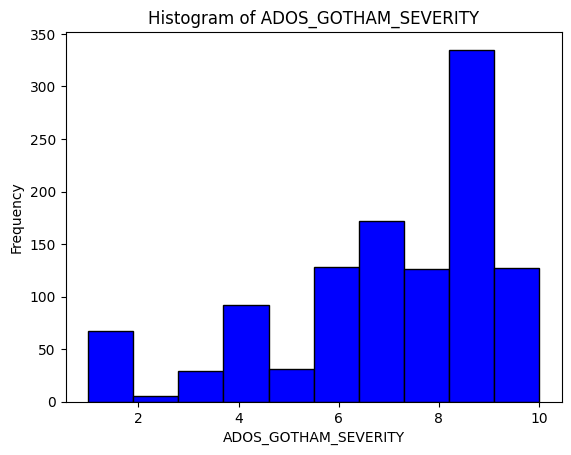

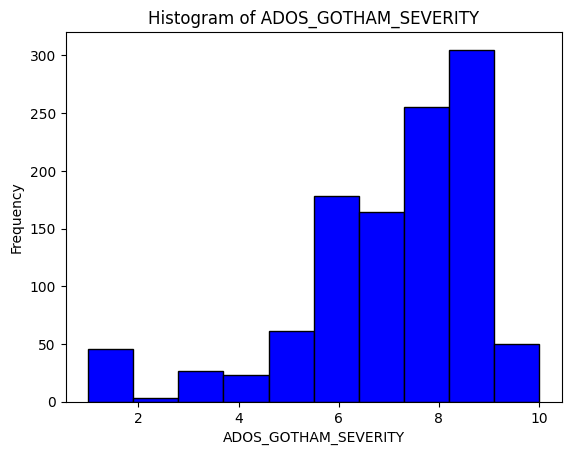

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_1['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


# second histogram 

# Plot histogram
plt.hist(imputed_df_3['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()

for the cross validation, check each severity type 

        SUB_ID  AGE_AT_SCAN  HANDEDNESS_SCORES       FIQ       VIQ       PIQ  \
0     0.596262     0.284026            0.81500  0.719626  0.630435  0.558333   
1     0.596885     0.561272            1.00000  0.682243  0.478261  0.683333   
2     0.597508     0.322440            0.95000  0.476636  0.340580  0.491667   
3     0.598131     0.311837            0.95500  0.532710  0.478261  0.425000   
4     0.600623     0.150704            0.95500  0.626168  0.420290  0.650000   
5     0.604984     0.198331            0.91000  0.663551  0.514493  0.591667   
6     0.618069     0.159743            0.91000  0.570093  0.384058  0.591667   
7     0.618692     0.178516            0.87500  0.635514  0.405797  0.683333   
8     0.619315     0.162350            0.26500  0.551402  0.340580  0.625000   
9     0.619938     0.170346            0.33500  0.766355  0.644928  0.600000   
10    0.621184     0.140101            0.50000  0.504673  0.434783  0.425000   
11    0.631153     0.408656            0

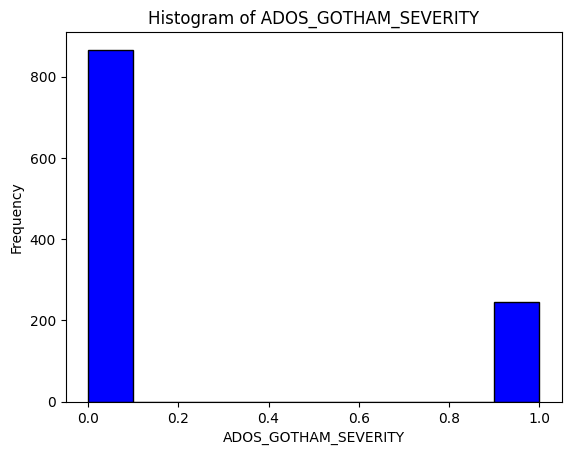

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame called one_hot_encoded_data
# Assuming you have a variable called 'severity_column' storing the 'ADOS_GOTHAM_SEVERITY' column
severity_column = one_hot_encoded_data['ADOS_GOTHAM_SEVERITY']
# Remove the 'ADOS_GOTHAM_SEVERITY' column
one_hot_encoded_data_without_severity = one_hot_encoded_data.drop('ADOS_GOTHAM_SEVERITY', axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(one_hot_encoded_data_without_severity)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_encoded_data_without_severity.columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)


# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=one_hot_encoded_data.columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


Testing with standard scaler instead

        SUB_ID  AGE_AT_SCAN  HANDEDNESS_SCORES       FIQ       VIQ       PIQ  \
0     0.461062     0.717201           0.051291  0.638510  1.305019 -0.171227   
1     0.463297     2.702809           0.831380  0.372991  0.011553  0.807164   
2     0.465531     0.992323           0.620545 -1.087366 -1.158726 -0.693036   
3     0.467766     0.916384           0.641628 -0.689087  0.011553 -1.214844   
4     0.476705    -0.237634           0.641628 -0.025288 -0.481196  0.546260   
5     0.492348     0.103468           0.451877  0.240231  0.319521  0.089677   
6     0.539278    -0.172899           0.451877 -0.423567 -0.789164  0.089677   
7     0.541512    -0.038450           0.304293  0.041092 -0.604383  0.807164   
8     0.543747    -0.154226          -2.267890 -0.556327 -1.158726  0.350581   
9     0.545982    -0.096960          -1.972722  0.970409  1.428206  0.154903   
10    0.550451    -0.313572          -1.276967 -0.888226 -0.358009 -1.214844   
11    0.586207     1.609791           0.

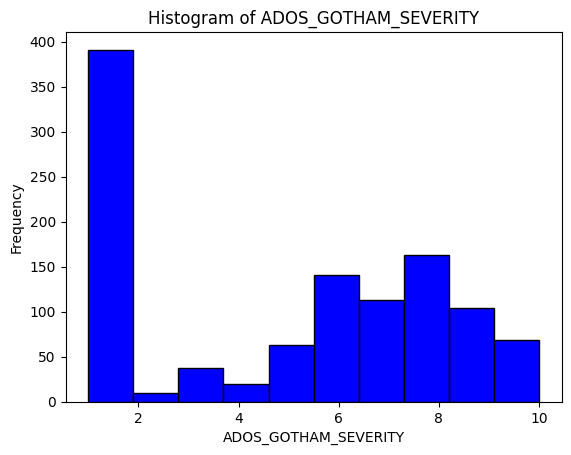

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called one_hot_encoded_data
# Assuming you have a variable called 'severity_column' storing the 'ADOS_GOTHAM_SEVERITY' column
severity_column = one_hot_encoded_data['ADOS_GOTHAM_SEVERITY']
# Remove the 'ADOS_GOTHAM_SEVERITY' column
one_hot_encoded_data_without_severity = one_hot_encoded_data.drop('ADOS_GOTHAM_SEVERITY', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(one_hot_encoded_data_without_severity)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_encoded_data_without_severity.columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)


# Impute the data using sklearn KNNImputer 
# KNNImputer only works with numpy array

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


test the columns to see which ones are affecting the scaling 

figure out knn is handling missing values - how it imputes the actual score 
figure out why the different scaling methods have different results, plot the different distributions
how to use cross validation to pick the best k and state why its the best - do it for each severity 
how to visualize? combine plots